In [18]:
import numpy as np
import pickle
tabDonnees = np.load("baseDonneesEntiere.npy",allow_pickle=True)

MemoryError: Unable to allocate 14.8 GiB for an array with shape (1982046446,) and data type float64

In [2]:
print(tabDonnees.shape)

(102592, 7201)


In [3]:
tabImg=tabDonnees[:,:7200]
tabDiag=tabDonnees[:,7200]
print(tabImg.shape)
print(tabImg[1])
print(tabDiag.shape)
print(tabDiag[1])

(102592, 7200)
[0.85882354 0.58823532 0.77254903 ... 0.97647059 0.95294118 0.98039216]
(102592,)
0.0


In [4]:
import sklearn as sk
from sklearn.model_selection import train_test_split


Xtrain,Xtest,ytrain,ytest = train_test_split(tabImg,tabDiag,test_size=0.25,random_state=0)

In [5]:
print(np.shape(Xtrain))
print(np.shape(ytrain))
print(np.shape(Xtest))
print(np.shape(ytest))

(76944, 7200)
(76944,)
(25648, 7200)
(25648,)


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [ ]:
#On commence par la méthode des plus proches voisins

KNN = KNeighborsClassifier()
clf = KNN.fit(Xtrain, ytrain)
ypredit = clf.predict(Xtest)
accuracy_score(ytest, ypredit)

In [9]:
#Méthode par arbre de décision

Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20)
clf = Arbre_decision.fit(Xtrain, ytrain)
ypredit = clf.predict(Xtest)
accuracy_score(ytest, ypredit)

0.8055988771054273

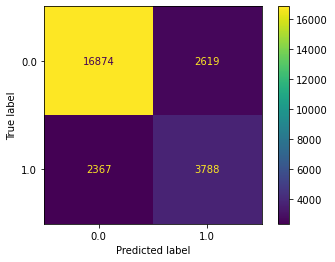

In [16]:
#matrice de confusion
plot_confusion_matrix(clf,Xtest,ytest)
plt.show()

In [9]:
#Méthode SVM

clf = svm.SVC(gamma=0.001)
clf.fit(Xtrain,ytrain)
ypredit = clf.predict(Xtest)
accuracy_score(ytest, ypredit)

0.8637710542732376